In [4]:
from quality import Hardness, list_files_in_directory
import matplotlib.pyplot as plt
import numpy as np


In [7]:
csv_files = list_files_in_directory('data/optimize/config')

num_datasets = len(csv_files)


# Determine the grid size (rows and columns) for subplots
rows = int(np.ceil(np.sqrt(num_datasets)))  # Number of rows
cols = int(np.ceil(num_datasets / rows))   # Number of columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(200, 150))
axes = axes.flatten()  # Flatten the axes for easy iteration

csv_objects = [Hardness(file).isolation_hardness() for file in csv_files]
# Plot each dataset
for i, (dataset_name, anomaly_scores) in enumerate(zip(csv_files, csv_objects)):
    ax = axes[i]
    ax.hist(anomaly_scores, bins=20, color='skyblue', edgecolor='black')
    ax.axvline(0, color='red', linestyle='--', label='Anomaly Threshold (0)')
    ax.set_title(dataset_name)
    ax.set_xlabel('Anomaly Score')
    ax.set_ylabel('Frequency')
    ax.legend()

# Hide any unused subplots
for j in range(len(csv_files), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

DATA(cols=COLS(names=['MRE-', 'ACC+', 'PRED40+', 'N_estimators', 'criterion', 'Min_sample_leaves', 'Min_impurity_decrease', 'Max_depth'], all=[NUM(n=10000, at=0, txt='MRE-', mu=82.32180299999965, m2=1549924.3379919105, sd=12.450218254819886, lo=50.26, hi=100, goal=0), NUM(n=10000, at=1, txt='ACC+', mu=5.151613999999989, m2=145571.66035004015, sd=3.8155762208601907, lo=-16.92, hi=35.05, goal=1), NUM(n=10000, at=2, txt='PRED40+', mu=22.097500000000014, m2=1830129.9375000002, sd=13.52890597497403, lo=0, hi=37.5, goal=1), NUM(n=10000, at=3, txt='N_estimators', mu=106.06099999999988, m2=32638142.790000062, sd=57.13265872571758, lo=10, hi=200, goal=1), SYM(n=10000, at=4, txt='criterion', has={'squared_error': 3363, 'absolute_error': 3302, 'poisson': 3335}, mode='squared_error', most=3363), NUM(n=10000, at=5, txt='Min_sample_leaves', mu=10.479600000000017, m2=333961.8383999997, sd=5.7792321109624245, lo=1, hi=20, goal=1), NUM(n=10000, at=6, txt='Min_impurity_decrease', mu=4.996174999999974, m

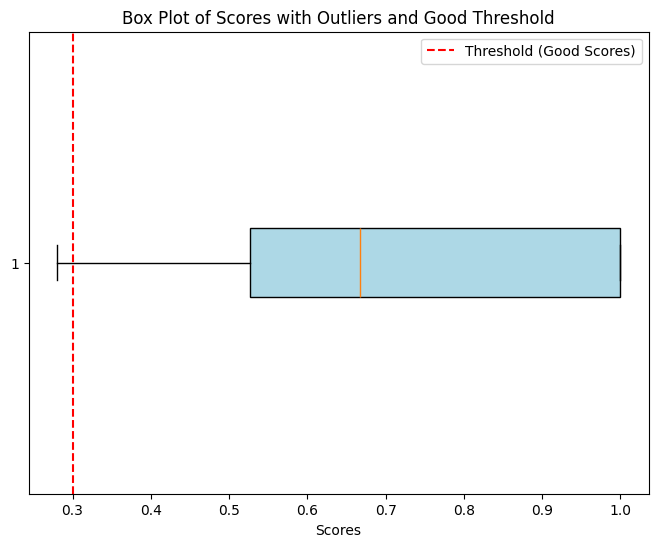

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ezr import *

# Input: List of scores
d = DATA().adds(csv('data/optimize/hpo/healthCloseIsses12mths0001-hard.csv'))
print(d)
d.chebyshevs()
scores = [d.chebyshev(r) for r in d.rows]
print(scores)

# Define a threshold for "good" scores
threshold = 0.3

# Compute metrics
mean_all = np.mean(scores)
good_scores = [score for score in scores if score <= threshold]
mean_good = np.mean(good_scores) if good_scores else np.nan
deviation = abs(mean_good - mean_all) if good_scores else np.nan

# Identify outliers
q1, q3 = np.percentile(scores, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [score for score in scores if score < lower_bound or score > upper_bound]

# Print results
print(f"Mean of all scores: {mean_all:.2f}")
print(f"Mean of good scores: {mean_good:.2f}")
print(f"Deviation of good scores from mean: {deviation:.2f}")
print(f"Number of outliers: {len(outliers)}")
print(f"Outliers: {outliers}")

# Visualization: Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(scores, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.axvline(threshold, color="red", linestyle="--", label="Threshold (Good Scores)")
plt.xlabel("Scores")
plt.title("Box Plot of Scores with Outliers and Good Threshold")
plt.legend()
plt.show()
